# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Gabriel da Silva Navarro`
### **NUSP**: `13727908`
### **Hash**: `60`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [2]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

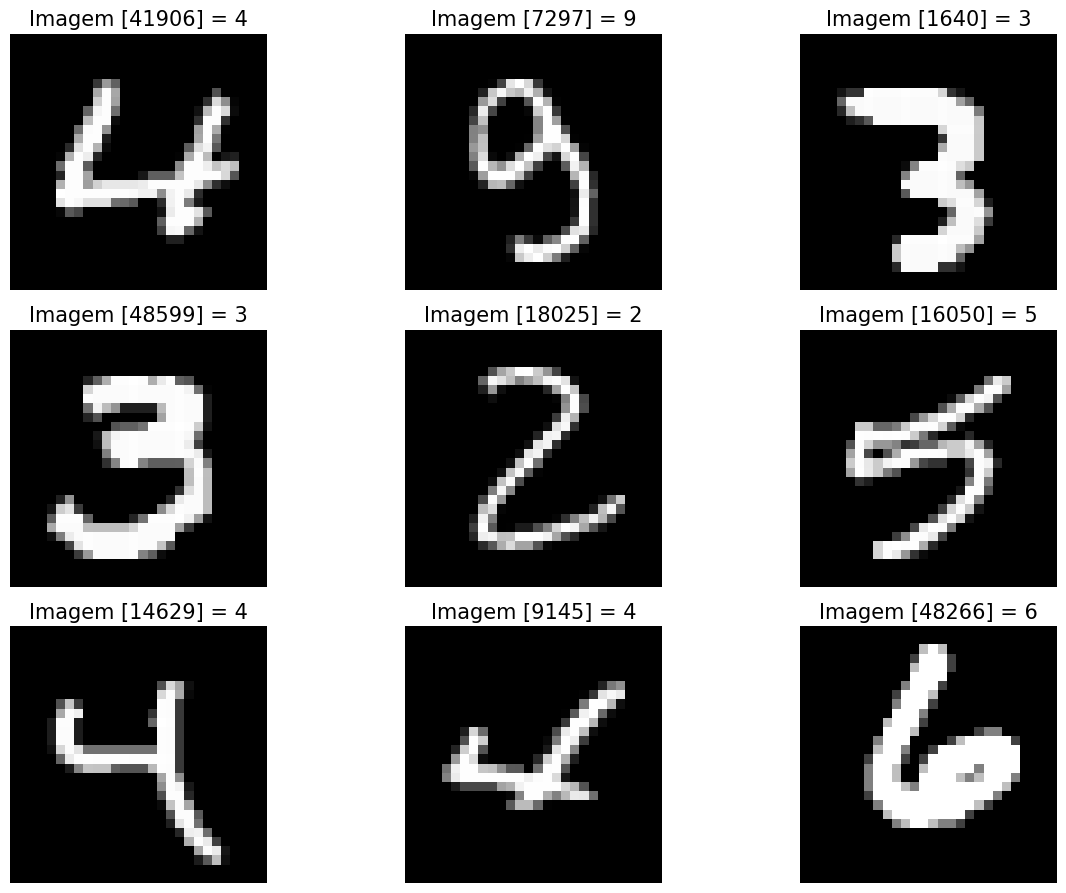

In [3]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [16]:
# Importa a biblioteca pandas para lidar com Dataframes.
import pandas as pd
# Importa a biblioteca numpy para lidar com arrays.
import numpy as np
# Importa o módulo graph_objects da biblioteca plotly para lidar com visualizações gráficas.
import plotly.graph_objects as go
# Importa o módulo pyplot da biblioteca matplotlib para lidar com a visualização de imagens.
import matplotlib.pyplot as plt
# Importa o objeto Optional da biblioteca typing para lidar com tipagens opcionais.
from typing import Optional
# Importa do módulo model_selection da biblioteca sklearn o método train_test_split para separar os dados em treino e teste.
from sklearn.model_selection import train_test_split
# Importa do módulo preprocessing da biblioteca sklearn o objeto StandardScaler para normalizar os dados.
from sklearn.preprocessing import StandardScaler
# Importa do módulo neural_network da biblioteca sklearn o objeto MLPClassifier para criar a rede neural.
from sklearn.neural_network import MLPClassifier
# Importa do módulo metrics da biblioteca sklearn os métodos classification_report e accuracy_score para gerar as métricas de avaliação.
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.


O número do Dataset associado ao meu hash é: 1.


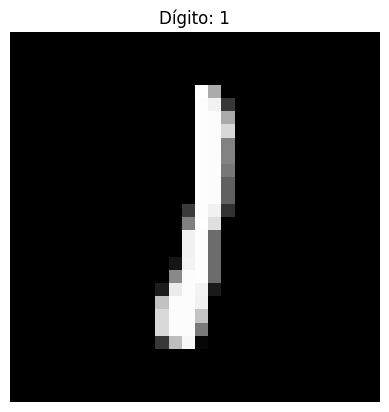

In [18]:
# A variável "y_tot" contém os rótulos (labels) das imagens no Dataset. 
# Sabendo que meu hash é 60, o código abaixo identifica o rótulo do Dataset correspondente ao meu hash.
print(f"O número do Dataset associado ao meu hash é: {y_tot[60]}.")

# Caso eu deseje visualizar a imagem associada ao meu hash no Dataset,
# o código abaixo exibe a imagem correspondente com o rótulo indicado no título.
plt.imshow(X_tot[60], cmap='gray')  # Exibe a imagem em escala de cinza.
plt.title(f"Dígito: {y_tot[60]}")   # Mostra o rótulo da imagem como título.
plt.axis('off')                     # Remove os eixos para uma exibição mais limpa.
plt.show()

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [22]:
# Inicializa a variável para contar o número de pixels claros.
bright_pixels_number = 0

# Calcula o total de pixels na imagem (28x28 é a dimensão padrão das imagens do Dataset).
total_pixels_number = 28 * 28

# Itera por cada linha de pixels na imagem associada ao hash (X_tot[60]).
for line in X_tot[60]:
    # Conta os pixels claros (valores >= 128) na linha e adiciona ao total.
    bright_pixels_number += len(line[line >= 128])
    
# Calcula e exibe a probabilidade de um pixel ser claro, formatando o resultado como porcentagem.
print(f"Para a imagem vinculada ao meu Hash, a probabilidade de um pixel claro (128 - 255) \
ocorrer é de aproximadamente {((bright_pixels_number / total_pixels_number) * 100):.2f}%.")

Para a imagem vinculada ao meu Hash, a probabilidade de um pixel claro (128 - 255) ocorrer é de aproximadamente 6.63%.


## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [23]:
# Obtém os índices de todas as imagens no Dataset que pertencem à classe 1 (ou seja, possuem rótulo igual a 1).
same_class_indexes = np.where(y_tot == 1)[0]

# Inicializa a variável para contar o número total de pixels claros.
bright_pixels_number = 0

# Calcula o total de pixels considerando todas as imagens da mesma classe (28x28 pixels por imagem multiplicado pela
# quantidade de imagens na classe).
total_pixels_number = 28 * 28 * len(same_class_indexes)

# Itera por cada índice das imagens pertencentes à classe 1.
for index in same_class_indexes:
    # Recupera a matriz de pixels da imagem correspondente ao índice atual.
    element = X_tot[index]
    # Conta os pixels claros (valores >= 128) na imagem atual e soma ao total acumulado.
    bright_pixels_number += len(element[element >= 128])

# Calcula e exibe a probabilidade de um pixel claro (128 - 255) ocorrer, formatando o resultado como porcentagem.
print(f"Para as imagens vinculadas à classe 1, a probabilidade de um pixel claro (128 - 255) \
ocorrer é de aproximadamente {((bright_pixels_number / total_pixels_number) * 100):.2f}%.")


Para as imagens vinculadas à classe 1, a probabilidade de um pixel claro (128 - 255) ocorrer é de aproximadamente 7.69%.


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [10]:
unique_digits = np.unique(y_tot)

for digit in unique_digits:
    digit_indexes = np.where(y_tot == digit)[0]
    
    #
    pixels_sum = 0
    #
    for index in digit_indexes:
        #
        pixels_sum += np.sum(X_tot[index])
    
    #
    print(f"Informações sobre o dígito '{digit}':")
    #
    digits_number = len(y_tot[y_tot == digit])
    #
    print(f"        Existem {digits_number} dígitos '{digit}' no Dataset.")
    #
    print(f"        O valor médio dos píxeis dos dígitos classificados como '{digit}' é aproximadamente {(pixels_sum)/(digits_number*28*28):.2f}\n")

Informações sobre o dígito '0':
        Existem 5920 dígitos '0' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '0' é aproximadamente 44.23

Informações sobre o dígito '1':
        Existem 6725 dígitos '1' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '1' é aproximadamente 19.40



Informações sobre o dígito '2':
        Existem 6023 dígitos '2' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '2' é aproximadamente 38.02

Informações sobre o dígito '3':
        Existem 6107 dígitos '3' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '3' é aproximadamente 36.23

Informações sobre o dígito '4':
        Existem 5918 dígitos '4' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '4' é aproximadamente 31.04

Informações sobre o dígito '5':
        Existem 5376 dígitos '5' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '5' é aproximadamente 32.92

Informações sobre o dígito '6':
        Existem 5915 dígitos '6' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '6' é aproximadamente 35.24

Informações sobre o dígito '7':
        Existem 6238 dígitos '7' no Dataset.
        O valor médio dos píxeis dos dígitos classificados como '7' é apr

### Resposta 01: 

**O Dataset em questão possui:**

- **5920 iguais dígitos à '0'.**


- **6725 iguais dígitos à '1'.**


- **6023 iguais dígitos à '2'.**


- **6107 iguais dígitos à '3'.**


- **5918 iguais dígitos à '4'.**


- **5376 iguais dígitos à '5'.**


- **5915 iguais dígitos à '6'.**


- **6238 iguais dígitos à '7'.**


- **5856 iguais dígitos à '8'.**


- **5922 iguais dígitos à '9'.**

### Resposta 02: 

**Não, os dígitos aparecem em diferentes quantidades.**

### Resposta 03: 

- **O valor médio dos píxeis cujos dígitos são classificados como '0' é, aproximadamente: 44.23.**


- **O valor médio dos píxeis cujos dígitos são classificados como '1' é, aproximadamente: 19.40.**


- **O valor médio dos píxeis cujos dígitos são classificados como '2' é, aproximadamente: 38.02.**


- **O valor médio dos píxeis cujos dígitos são classificados como '3' é, aproximadamente: 36.23.**


- **O valor médio dos píxeis cujos dígitos são classificados como '4' é, aproximadamente: 31.04.**


- **O valor médio dos píxeis cujos dígitos são classificados como '5' é, aproximadamente: 32.92.**


- **O valor médio dos píxeis cujos dígitos são classificados como '6' é, aproximadamente: 35.24.**


- **O valor médio dos píxeis cujos dígitos são classificados como '7' é, aproximadamente: 29.26.**


- **O valor médio dos píxeis cujos dígitos são classificados como '8' é, aproximadamente: 38.40.**


- **O valor médio dos píxeis cujos dígitos são classificados como '9' é, aproximadamente: 31.34.**

## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


In [8]:
aux = {}
for value in np.unique(X_tot[0]):
    if value not in aux.keys():
        aux[value] = 0
    else:
        aux[value] += 1
        
aux

{0: 0, 64: 0, 128: 0, 191: 0, 255: 0}

In [9]:
#
unique_digits = np.unique(y_tot)
#
results = []
#
for digit in unique_digits:
    #
    result = []
    #
    indexes = np.where(y_tot == digit)[0]
    #
    for index in indexes:
        #
        for line in X_tot[index]:
            result.extend(line.reshape(-1))
    
    results.append(result)

In [11]:
def plot_histogram(data: pd.Series, title="", xaxis_title="", yaxis_title="") -> None:
    '''
        Description:
        Args:
        Return:
    '''
    
    fig = go.Figure(data=[
    go.Histogram(x=data, nbinsx=20)
    ])

    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        bargap=0.1
    )

    fig.show()

In [ ]:
for digit in unique_digits:
    plot_histogram(results[digit], f"Distribuição dos valores dos píxeis do dígito {digit}", "Valores", "Quantidade")

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [20]:
a = X_tot

In [26]:
len(X_tot[0])

28

In [ ]:
X,y = np.copy(X_tot)[0], np.copy(y_tot)

In [19]:
X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
#
X_train = X_train.reshape(X_train.shape[0], -1)
#
X_test = X_test.reshape(X_test.shape[0], -1)

In [33]:
#
scaler = StandardScaler()
#
X_train = scaler.fit_transform(X_train)
#
X_test = scaler.transform(X_test)

In [ ]:
# Criar o modelo de rede neural com o MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(8,8),  # Duas camadas ocultas com 128 e 64 neurônios
    activation='relu',
    solver='adam',
    max_iter=10,
    random_state=10
)

# Treinar o modelo
mlp.fit(X_train, y_train)


# FALAR QUE A HIDDEN LAYER JA ESTÁ IMBUTIDA AUTOMATICAMENTE NO MLPCLASSIFIER E FALAR QUE O MAX_ITER É QUASE QUE O EQUIVALENTE AS EPOCH

/home/user/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=10)

In [39]:
# Fazer previsões
y_pred = mlp.predict(X_test)

# Avaliar a precisão
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado de classificação
print(classification_report(y_test, y_pred))


Acurácia: 0.91975
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1189
           1       0.94      0.97      0.96      1386
           2       0.93      0.89      0.91      1232
           3       0.91      0.89      0.90      1228
           4       0.91      0.95      0.93      1143
           5       0.89      0.88      0.88      1116
           6       0.94      0.94      0.94      1158
           7       0.93      0.92      0.92      1268
           8       0.91      0.87      0.89      1142
           9       0.89      0.90      0.89      1138

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [40]:
# Criar o modelo de rede neural com o MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256,256,256,256),  # Duas camadas ocultas com 128 e 64 neurônios
    activation='relu',
    solver='adam',
    max_iter=20,
    random_state=10
)

# Treinar o modelo
mlp.fit(X_train, y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=10)

In [41]:
# Fazer previsões
y_pred = mlp.predict(X_test)

# Avaliar a precisão
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado de classificação
print(classification_report(y_test, y_pred))


Acurácia: 0.9729166666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1189
           1       0.99      0.99      0.99      1386
           2       0.97      0.97      0.97      1232
           3       0.97      0.95      0.96      1228
           4       0.99      0.97      0.98      1143
           5       0.98      0.95      0.96      1116
           6       0.98      0.98      0.98      1158
           7       0.98      0.98      0.98      1268
           8       0.93      0.98      0.95      1142
           9       0.96      0.97      0.97      1138

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!